In [3]:

import os
import json
import numpy as np

# Define the datasets of interest
datasets = [
    'vqa-v2', 'textvqa-ocr', 'textvqa-pure', 'gqa', 'refcoco',
    'wsc273', 'winogrande', 'lambada_standard', 'arc_easy', 'arc_challenge'
]

# Define the result dictionary
results_nlp = {}

# Path to the JSON results file
results_file = 'results_nlp.json'

# Read the JSON results file
if os.path.isfile(results_file):
    with open(results_file, 'r') as f:
        results_nlp = json.load(f)
else:
    print(f"Error: File {results_file} not found.")


In [11]:
import json
import numpy as np

# Load the results from the JSON file
with open('results_nlp.json') as f:
    results_dict = json.load(f)

# Define the models of interest and their corresponding baselines with labels
models_of_interest = {
    "stage-final-llava-v15-pythia+1p4b": ("reproduction-align-pythia+1p4b", "LLaVA + Pythia Instruct (1.4B)"),
    "stage-final-llava-v15-pythia+1p4b-instruct-old": ("reproduction-align-pythia+1p4b-instruct-old", "LLaVA + Pythia (1.4B)"),
    "reproduction-llava-v15+7b+stage-finetune+x7": ("reproduction-llava-v15+7b+stage-align+x7", "LLaVA + LLaMA2 Instruct (7B)"),
    "reproduction-llama2": ("vila_base_llm", "LLaVA + LLaMA2 Base (7B)")
}

# Function to format values or return "-"
def format_value(value):
    return "{:.1f}".format(value * 100) if not np.isnan(value) else "-"

# Prepare the data for the LaTeX tables
table_data = []

for model, (baseline, label) in models_of_interest.items():
    accuracies = results_dict[model]
    baseline_accuracies = results_dict[baseline]
    
    avg_acc_vl = sum(accuracies[dataset] for dataset in ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]) / 4
    
    nlu_deltas = {dataset: accuracies[dataset] - baseline_accuracies.get(dataset, 0) for dataset in ["wsc273", "winogrande", "arc_easy", "arc_challenge"]}
    avg_delta_nlu = sum(nlu_deltas[dataset] for dataset in nlu_deltas) / 4
    avg_acc_nlu = sum(accuracies[dataset] for dataset in nlu_deltas) / 4
    
    delta_nlg = accuracies["lambada_standard"] - baseline_accuracies.get("lambada_standard", 0)
    avg_acc_nlg = accuracies["lambada_standard"]
    
    table_data.append((label, accuracies, avg_acc_vl, avg_delta_nlu, avg_acc_nlu, delta_nlg, avg_acc_nlg))

# Sort the data by Avg. VL Accuracy and highest NLG Delta
table_data = sorted(table_data, key=lambda x: (x[2], -x[5]), reverse=True)

# Generate LaTeX table
latex_code = """
\\begin{table*}[h]
  \\caption{\\textbf{LLaVA Model Performance}}
  \\label{tab:model_performance}
  \\centering
  \\resizebox{\\linewidth}{!}{
    \\begin{tabular}{l|cccc|c|cc|cc}
     \\toprule
     \\textbf{Model} & \\multicolumn{4}{c|}{\\textbf{Vision-Language (VL)}} & \\textbf{VL Avg.} & \\multicolumn{2}{c|}{\\textbf{NLU Avg.}} & \\multicolumn{2}{c}{\\textbf{NLG Avg.}} \\\\
     & \\textbf{VQAv2} & \\textbf{TextVQA OCR} & \\textbf{TextVQA Pure} & \\textbf{GQA} & Acc $\\uparrow$ & $\\Delta \\uparrow$ & Acc $\\uparrow$ & $\\Delta \\uparrow$ & Acc $\\uparrow$ \\\\
     \\midrule
"""

for label, accuracies, avg_acc_vl, avg_delta_nlu, avg_acc_nlu, delta_nlg, avg_acc_nlg in table_data:
    latex_code += "{label} & {vqa_v2} & {textvqa_ocr} & {textvqa_pure} & {gqa} & {avg_acc_vl} & {delta_nlu} & {avg_acc_nlu} & {delta_nlg} & {avg_acc_nlg} \\\\\n".format(
        label=label,
        vqa_v2=format_value(accuracies["vqa-v2"]),
        textvqa_ocr=format_value(accuracies["textvqa-ocr"]),
        textvqa_pure=format_value(accuracies["textvqa-pure"]),
        gqa=format_value(accuracies["gqa"]),
        avg_acc_vl=format_value(avg_acc_vl),
        delta_nlu=format_value(avg_delta_nlu),
        avg_acc_nlu=format_value(avg_acc_nlu),
        delta_nlg=format_value(delta_nlg),
        avg_acc_nlg=format_value(avg_acc_nlg)
    )

latex_code += """
     \\bottomrule
    \\end{tabular}
  }
\\end{table*}
"""

print(latex_code)


\begin{table*}[h]
  \caption{\textbf{LLaVA Model Performance}}
  \label{tab:model_performance}
  \centering
  \resizebox{\linewidth}{!}{
    \begin{tabular}{l|cccc|c|cc|cc}
     \toprule
     \textbf{Model} & \multicolumn{4}{c|}{\textbf{Vision-Language (VL)}} & \textbf{VL Avg.} & \multicolumn{2}{c|}{\textbf{NLU Avg.}} & \multicolumn{2}{c}{\textbf{NLG Avg.}} \\
     & \textbf{VQAv2} & \textbf{TextVQA OCR} & \textbf{TextVQA Pure} & \textbf{GQA} & Acc $\uparrow$ & $\Delta \uparrow$ & Acc $\uparrow$ & $\Delta \uparrow$ & Acc $\uparrow$ \\
     \midrule
LLaVA + LLaMA2 Base (7B) & 75.9 & 55.2 & 45.4 & 60.2 & 59.2 & 2.7 & 70.0 & 0.4 & 68.7 \\
LLaVA + LLaMA2 Instruct (7B) & 74.5 & 56.3 & 45.9 & 56.2 & 58.2 & 0.3 & 68.8 & -2.0 & 62.3 \\
LLaVA + Pythia Instruct (1.4B) & 66.2 & 38.5 & 35.5 & 46.1 & 46.6 & -1.1 & 53.0 & -8.1 & 40.9 \\
LLaVA + Pythia (1.4B) & 64.0 & 39.8 & 34.4 & 44.5 & 45.7 & -4.6 & 49.5 & -12.6 & 36.3 \\

     \bottomrule
    \end{tabular}
  }
\end{table*}



In [2]:
import json
import numpy as np

# Load the results from the JSON file
with open('results_nlp.json') as f:
    results_dict = json.load(f)

# Define the models of interest and their corresponding baselines with labels
models_of_interest = {
    "stage-final-llava-v15-pythia+1p4b": ("reproduction-align-pythia+1p4b", "LLaVA + Pythia Instruct (1.4B)"),
    "stage-final-llava-v15-pythia+1p4b-instruct": ("reproduction-align-pythia+1p4b-instruct", "LLaVA + Pythia (1.4B)"),
    "reproduction-llava-v15+7b+stage-finetune+x7": ("reproduction-llava-v15+7b+stage-align+x7", "LLaVA + LLaMA2 Instruct (7B)"),
    "reproduction-llama2": ("vila_base_llm", "LLaVA + LLaMA2 Base (7B)")
}

# Function to format values or return "-"
def format_value(value):
    return "{:.1f}".format(value * 100) if not np.isnan(value) else "-"

# Prepare the data for the LaTeX tables
table_data = []

for model, (baseline, label) in models_of_interest.items():
    accuracies = results_dict[model]
    baseline_accuracies = results_dict[baseline]
    
    avg_acc_vl = sum(accuracies[dataset] for dataset in ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]) / 4
    
    nlu_deltas = {dataset: accuracies[dataset] - baseline_accuracies.get(dataset, 0) for dataset in ["wsc273", "winogrande", "arc_easy", "arc_challenge"]}
    avg_delta_nlu = sum(nlu_deltas[dataset] for dataset in nlu_deltas) / 4
    avg_acc_nlu = sum(accuracies[dataset] for dataset in nlu_deltas) / 4
    
    delta_nlg = accuracies["lambada_standard"] - baseline_accuracies.get("lambada_standard", 0)
    avg_acc_nlg = accuracies["lambada_standard"]
    
    table_data.append((label, accuracies, avg_acc_vl, avg_delta_nlu, avg_acc_nlu, delta_nlg, avg_acc_nlg))

# Sort the data by Avg. VL Accuracy and highest NLG Delta
table_data = sorted(table_data, key=lambda x: (x[2], -x[5]), reverse=True)

# Generate LaTeX table
latex_code = """
\\begin{table*}[h]
  \\caption{\\textbf{LLaVA Model Performance}}
  \\label{tab:model_performance}
  \\centering
  \\resizebox{\\linewidth}{!}{
    \\begin{tabular}{l|cccc|c|cc|cc}
     \\toprule
     \\textbf{Model} & \\multicolumn{4}{c|}{\\textbf{Vision-Language (VL)}} & \\textbf{VL Avg.} & \\multicolumn{2}{c|}{\\textbf{NLU Avg.}} & \\multicolumn{2}{c}{\\textbf{NLG Avg.}} \\\\
     & \\textbf{VQAv2} & \\textbf{TextVQA OCR} & \\textbf{TextVQA Pure} & \\textbf{GQA} & Acc $\\uparrow$ & $\\Delta \\uparrow$ & Acc $\\uparrow$ & $\\Delta \\uparrow$ & Acc $\\uparrow$ \\\\
     \\midrule
"""

for label, accuracies, avg_acc_vl, avg_delta_nlu, avg_acc_nlu, delta_nlg, avg_acc_nlg in table_data:
    latex_code += "{label} & {vqa_v2} & {textvqa_ocr} & {textvqa_pure} & {gqa} & {avg_acc_vl} & {delta_nlu} & {avg_acc_nlu} & {delta_nlg} & {avg_acc_nlg} \\\\\n".format(
        label=label,
        vqa_v2=format_value(accuracies["vqa-v2"]),
        textvqa_ocr=format_value(accuracies["textvqa-ocr"]),
        textvqa_pure=format_value(accuracies["textvqa-pure"]),
        gqa=format_value(accuracies["gqa"]),
        avg_acc_vl=format_value(avg_acc_vl),
        delta_nlu=format_value(avg_delta_nlu),
        avg_acc_nlu=format_value(avg_acc_nlu),
        delta_nlg=format_value(delta_nlg),
        avg_acc_nlg=format_value(avg_acc_nlg)
    )

latex_code += """
     \\bottomrule
    \\end{tabular}
  }
\\end{table*}
"""

print(latex_code)


\begin{table*}[h]
  \caption{\textbf{LLaVA Model Performance}}
  \label{tab:model_performance}
  \centering
  \resizebox{\linewidth}{!}{
    \begin{tabular}{l|cccc|c|cc|cc}
     \toprule
     \textbf{Model} & \multicolumn{4}{c|}{\textbf{Vision-Language (VL)}} & \textbf{VL Avg.} & \multicolumn{2}{c|}{\textbf{NLU Avg.}} & \multicolumn{2}{c}{\textbf{NLG Avg.}} \\
     & \textbf{VQAv2} & \textbf{TextVQA OCR} & \textbf{TextVQA Pure} & \textbf{GQA} & Acc $\uparrow$ & $\Delta \uparrow$ & Acc $\uparrow$ & $\Delta \uparrow$ & Acc $\uparrow$ \\
     \midrule
LLaVA + LLaMA2 Base (7B) & 75.9 & 55.2 & 45.4 & 60.2 & 59.2 & 2.7 & 70.0 & 0.4 & 68.7 \\
LLaVA + LLaMA2 Instruct (7B) & 74.5 & 56.3 & 45.9 & 56.2 & 58.2 & 0.3 & 68.8 & -2.0 & 62.3 \\
LLaVA + Pythia (1.4B) & 66.5 & 39.1 & 34.3 & 46.9 & 46.7 & 2.9 & 49.1 & 1.0 & 34.8 \\
LLaVA + Pythia Instruct (1.4B) & 66.2 & 38.5 & 35.5 & 46.1 & 46.6 & -1.1 & 53.0 & -8.1 & 40.9 \\

     \bottomrule
    \end{tabular}
  }
\end{table*}



In [1]:
import json
import numpy as np
from scipy.stats import hmean
from collections import defaultdict

# Load the results from the JSON file
with open('results_nlp.json') as f:
    results_dict = json.load(f)

# Define the models of interest and their corresponding baselines with labels
models_of_interest = {
    "stage-final-llava-v15-pythia+1p4b": ("reproduction-align-pythia+1p4b", "LLaVA + Pythia (1.4B)"),
    "stage-final-llava-v15-pythia+1p4b-instruct": ("reproduction-align-pythia+1p4b-instruct", "LLaVA + Pythia Instruct (1.4B)"),
    "reproduction-llava-v15+7b+stage-finetune+x7": ("reproduction-llava-v15+7b+stage-align+x7", "LLaVA + LLaMA2 Instruct (7B)"),
    "reproduction-llama2": ("vila_base_llm", "LLaVA + LLaMA2 Base (7B)")
}

# Function to format values or return "-"
def format_value(value):
    return "{:.2f}".format(value * 100) if not np.isnan(value) else "-"

# Function to check if a model is instruction fine-tuned
def is_instruction_fine_tuned(label):
    return "Instruct" in label

# Prepare the data for the LaTeX tables
table_data = []

for model, (baseline, label) in models_of_interest.items():
    accuracies = results_dict[model]
    baseline_accuracies = results_dict[baseline]
    
    avg_acc_vl = hmean([accuracies[dataset] for dataset in ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]])
    avg_acc_nl = hmean([accuracies[dataset] for dataset in ["wsc273", "winogrande", "arc_easy", "arc_challenge", "lambada_standard"]])
    avg_acc_nlu = hmean([accuracies[dataset] for dataset in ["wsc273", "winogrande", "arc_easy", "arc_challenge"]])
    avg_acc_nlg = accuracies["lambada_standard"]
    baseline_avg_nlu = hmean([baseline_accuracies[dataset] for dataset in ["wsc273", "winogrande", "arc_easy", "arc_challenge"]])
    baseline_avg_nlg = baseline_accuracies["lambada_standard"]
    baseline_avg_acc_nl = hmean([baseline_accuracies[dataset] for dataset in ["wsc273", "winogrande", "arc_easy", "arc_challenge", "lambada_standard"]])
    delta_nl = baseline_avg_acc_nl - avg_acc_nl
    delta_nlu = baseline_avg_nlu - avg_acc_nlu
    delta_nlg = baseline_avg_nlg - avg_acc_nlg
    print(f"Model {label}: Avg. VL = {avg_acc_vl*100:.2f}, Avg. NL = {avg_acc_nl*100:.2f}, Delta NL = {delta_nl*100:.2f}, Delta NLU = {delta_nlu*100:.2f}, Delta NLG = {delta_nlg*100:.2f}")
    
    table_data.append((label, is_instruction_fine_tuned(label), avg_acc_vl, avg_acc_nl, delta_nl))

# Sort the data by Avg. VL Accuracy and highest NL Delta
table_data = sorted(table_data, key=lambda x: (x[2], -x[4]), reverse=True)

# Generate LaTeX table
latex_code = """
\\begin{table*}[h]
  \\caption{\\textbf{LLaVA Model Performance}}
  \\label{tab:model_performance}
  \\centering
  \\resizebox{\\linewidth}{!}{
    \\begin{tabular}{l|c|c|cc}
     \\toprule
     \\textbf{Model} & \\textbf{Instr.} & \\multicolumn{1}{c|}{\\textbf{VL Avg.}} & \\multicolumn{2}{c}{\\textbf{NL Avg.}} \\\\
     & & \\textbf{Acc $\\uparrow$} & \\textbf{Acc $\\uparrow$} & \\textbf{Delta $\\uparrow$} \\\\
     \\midrule
"""

for label, instr, avg_acc_vl, avg_acc_nl, delta_nl in table_data:
    latex_code += "{label} & {instr} & {avg_acc_vl} & {avg_acc_nl} & {delta_nl} \\\\\n".format(
        label=label,
        instr="\\ding{51}" if instr else "\\ding{55}",
        avg_acc_vl=format_value(avg_acc_vl),
        avg_acc_nl=format_value(avg_acc_nl),
        delta_nl=format_value(delta_nl)
    )

latex_code += """
     \\bottomrule
    \\end{tabular}
  }
\\end{table*}
"""

print(latex_code)

Model LLaVA + Pythia (1.4B): Avg. VL = 43.97, Avg. NL = 45.51, Delta NL = 2.18, Delta NLU = 0.55, Delta NLG = 8.07
Model LLaVA + Pythia Instruct (1.4B): Avg. VL = 43.93, Avg. NL = 41.37, Delta NL = -1.16, Delta NLU = -1.20, Delta NLG = -1.01
Model LLaVA + LLaMA2 Instruct (7B): Avg. VL = 56.55, Avg. NL = 64.44, Delta NL = -0.36, Delta NLU = -0.98, Delta NLG = 2.04
Model LLaVA + LLaMA2 Base (7B): Avg. VL = 57.22, Avg. NL = 66.23, Delta NL = -1.84, Delta NLU = -2.15, Delta NLG = -0.43

\begin{table*}[h]
  \caption{\textbf{LLaVA Model Performance}}
  \label{tab:model_performance}
  \centering
  \resizebox{\linewidth}{!}{
    \begin{tabular}{l|c|c|cc}
     \toprule
     \textbf{Model} & \textbf{Instr.} & \multicolumn{1}{c|}{\textbf{VL Avg.}} & \multicolumn{2}{c}{\textbf{NL Avg.}} \\
     & & \textbf{Acc $\uparrow$} & \textbf{Acc $\uparrow$} & \textbf{Delta $\uparrow$} \\
     \midrule
LLaVA + LLaMA2 Base (7B) & \ding{55} & 57.22 & 66.23 & -1.84 \\
LLaVA + LLaMA2 Instruct (7B) & \ding{51} & 

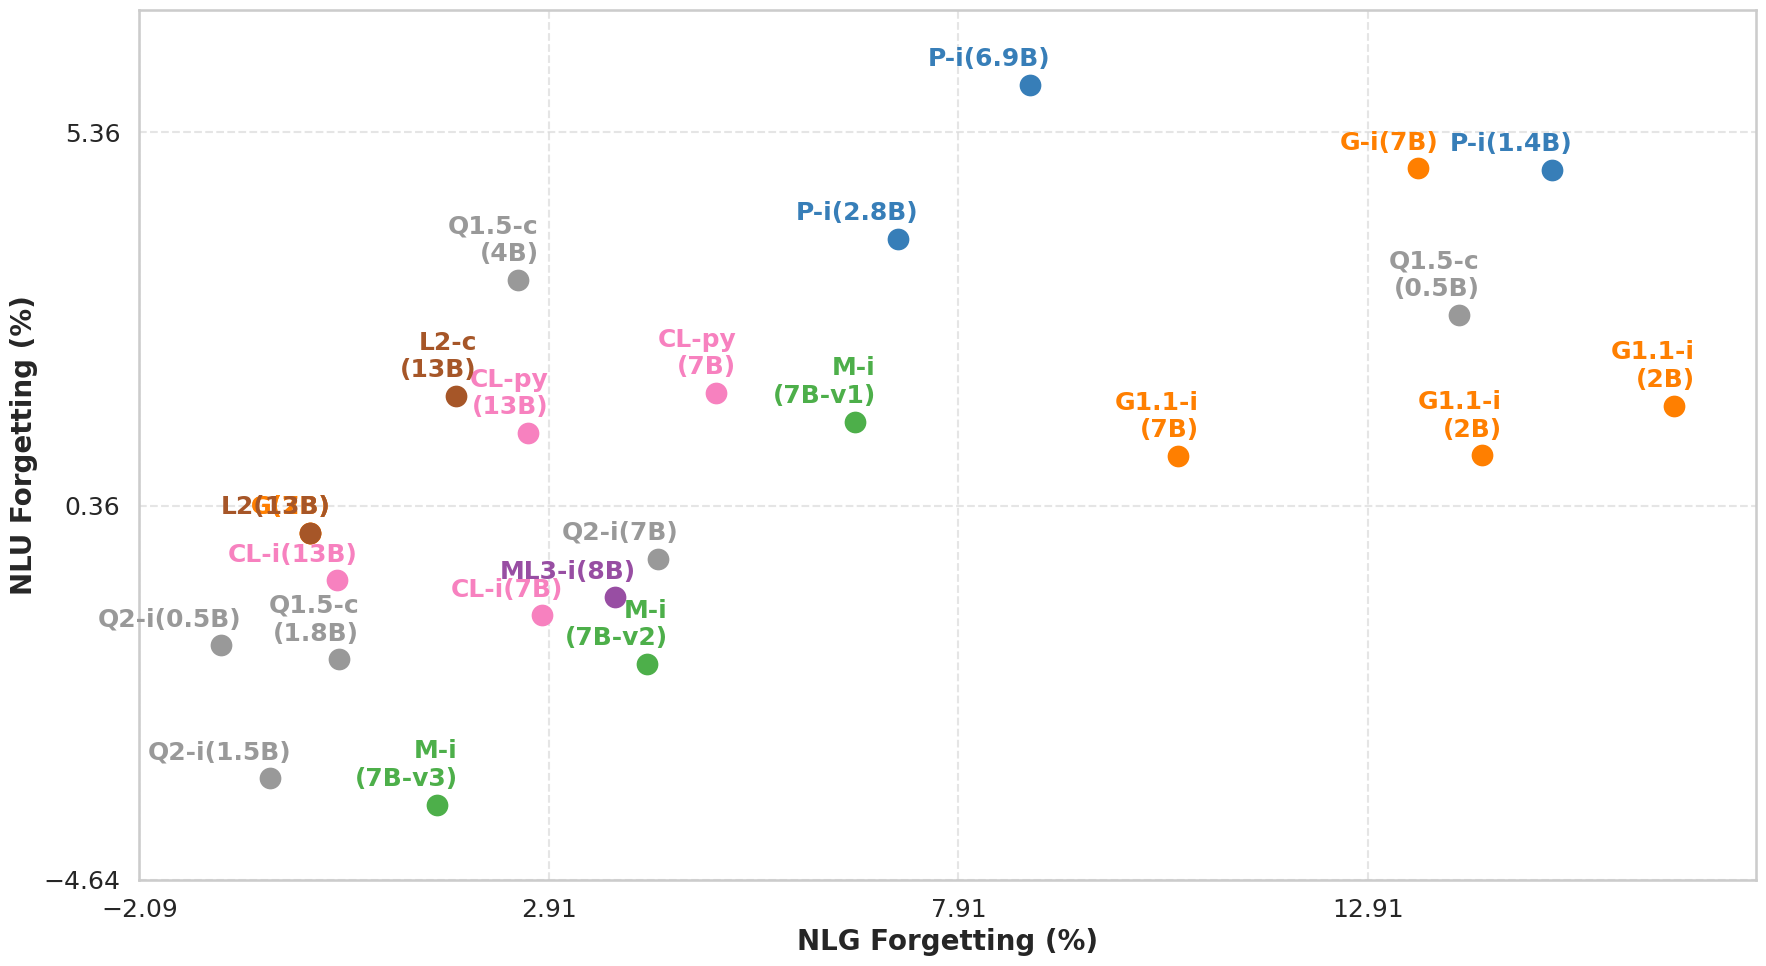

In [24]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import hmean

CB = ['#377eb8', '#ff7f00', '#4daf4a',
      '#f781bf', '#a65628', '#984ea3',
      '#999999', '#e41a1c', '#dede00']

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': [10, 6],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

plt.rcParams["figure.autolayout"] = True

# Load the JSON data from the file
with open('results_nlp.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Dictionary mapping instruct models to their corresponding base models
instruct_to_base_mapping = {
    "pythia-2.8b-deduped-synthetic-instruct": "pythia-2.8b-deduped",
    "pythia-1.4b-deduped-synthetic-instruct": "pythia-1.4b-deduped",
    "pythia-6.9b-deduped-synthetic-instruct": "pythia-6.9b-deduped",
    "gemma-2b-it": "gemma-2b",
    "gemma-2b": "gemma-2b",
    "gemma-1.1-2b-it": "gemma-2b",
    "gemma-7b": "gemma-7b",
    "gemma-7b-it": "gemma-7b",
    "gemma-1.1-7b-it": "gemma-7b",
    "Mistral-7B-Instruct-v0.1": "Mistral-7B-v0.1",
    "Mistral-7B-Instruct-v0.2": "Mistral-7B-v0.1",
    "Mistral-7B-Instruct-v0.3": "Mistral-7B-v0.1",
    "CodeLlama-7b-Python-hf": "CodeLlama-7b-hf",
    "CodeLlama-7b-Instruct-hf": "CodeLlama-7b-hf",
    "CodeLlama-13b-Instruct-hf": "CodeLlama-13b-hf",
    "CodeLlama-13b-Python-hf": "CodeLlama-13b-hf",
    "Llama-2-13b-hf": "Llama-2-13b-hf",
    "Llama-2-13b-chat-hf": "Llama-2-13b-hf",
    "CodeLlama-34b-Instruct-hf": "CodeLlama-34b-hf",
    "CodeLlama-34b-Python-hf": "CodeLlama-34b-hf",
    "Meta-Llama-3-8B-Instruct": "Meta-Llama-3-8B",
    "Qwen1.5-0.5B-Chat": "Qwen1.5-0.5B",
    "Qwen1.5-1.8B-Chat": "Qwen1.5-1.8B",
    "Qwen1.5-4B-Chat": "Qwen1.5-4B",
    # "Qwen1.5-7B-Chat": "Qwen1.5-7B",
    "Qwen2-0.5B-Instruct": "Qwen2-0.5B",
    "Qwen2-1.5B-Instruct": "Qwen2-1.5B",
    "Qwen2-7B-Instruct": "Qwen2-7B"
}

# Short labels for each model
short_label_mapping = {
    "pythia-2.8b-deduped-synthetic-instruct": "P-i(2.8B)",
    "pythia-1.4b-deduped-synthetic-instruct": "P-i(1.4B)",
    "pythia-6.9b-deduped-synthetic-instruct": "P-i(6.9B)",
    "gemma-2b-it": "G1.1-i\n(2B)",
    "gemma-2b": "G(2B)",
    "gemma-1.1-2b-it": "G1.1-i\n(2B)",
    "gemma-7b": "G(7B)",
    "gemma-7b-it": "G-i(7B)",
    "gemma-1.1-7b-it": "G1.1-i\n(7B)",
    "Mistral-7B-Instruct-v0.1": "M-i\n(7B-v1)",
    "Mistral-7B-Instruct-v0.2": "M-i\n(7B-v2)",
    "Mistral-7B-Instruct-v0.3": "M-i\n(7B-v3)",
    "CodeLlama-7b-Python-hf": "CL-py\n(7B)",
    "CodeLlama-7b-Instruct-hf": "CL-i(7B)",
    "CodeLlama-13b-Instruct-hf": "CL-i(13B)",
    "CodeLlama-13b-Python-hf": "CL-py\n(13B)",
    "Llama-2-13b-hf": "L2(13B)",
    "Llama-2-13b-chat-hf": "L2-c\n(13B)",
    "CodeLlama-34b-Instruct-hf": "CL-i(34B)",
    "CodeLlama-34b-Python-hf": "CL-py\n(34B)",
    "Meta-Llama-3-8B-Instruct": "ML3-i(8B)",
    "Qwen1.5-0.5B-Chat": "Q1.5-c\n(0.5B)",
    "Qwen1.5-1.8B-Chat": "Q1.5-c\n(1.8B)",
    "Qwen1.5-4B-Chat": "Q1.5-c\n(4B)",
    "Qwen1.5-7B-Chat": "Q1.5-c\n(7B)",
    "Qwen2-0.5B-Instruct": "Q2-i(0.5B)",
    "Qwen2-1.5B-Instruct": "Q2-i(1.5B)",
    "Qwen2-7B-Instruct": "Q2-i(7B)"
}

# Assign colors to each family
family_colors = {
    "pythia": CB[0],
    "gemma": CB[1],
    "Mistral": CB[2],
    "CodeLlama": CB[3],
    "Llama": CB[4],
    "Meta": CB[5],
    "Qwen1.5": CB[6],
    "Qwen2": CB[6]
}

# Function to calculate forgetting and performance using harmonic mean
def calculate_forgetting_and_performance(instruct_to_base_mapping, results):
    scores = []
    for instruct_model, base_model in instruct_to_base_mapping.items():
        base_model_name = base_model.split('/')[-1]
        instruct_model_name = instruct_model.split('/')[-1]
        
        if base_model in results and instruct_model in results:
            base_nlu_scores = [results[base_model].get(dataset, np.nan) * 100 for dataset in nlu_datasets]
            instruct_nlu_scores = [results[instruct_model].get(dataset, np.nan) * 100 for dataset in nlu_datasets]
            base_nlg_scores = [results[base_model].get(dataset, np.nan) * 100 for dataset in nlg_datasets]
            instruct_nlg_scores = [results[instruct_model].get(dataset, np.nan) * 100 for dataset in nlg_datasets]
            
            valid_base_nlu_scores = [score for score in base_nlu_scores if not np.isnan(score)]
            valid_instruct_nlu_scores = [score for score in instruct_nlu_scores if not np.isnan(score)]
            valid_base_nlg_scores = [score for score in base_nlg_scores if not np.isnan(score)]
            valid_instruct_nlg_scores = [score for score in instruct_nlg_scores if not np.isnan(score)]
            
            if valid_base_nlu_scores and valid_instruct_nlu_scores:
                base_hmean_nlu = hmean(valid_base_nlu_scores)
                instruct_hmean_nlu = hmean(valid_instruct_nlu_scores)
                nlu_forgetting = base_hmean_nlu - instruct_hmean_nlu
            else:
                nlu_forgetting = np.nan
            
            if valid_base_nlg_scores and valid_instruct_nlg_scores:
                base_hmean_nlg = hmean(valid_base_nlg_scores)
                instruct_hmean_nlg = hmean(valid_instruct_nlg_scores)
                nlg_forgetting = base_hmean_nlg - instruct_hmean_nlg
            else:
                nlg_forgetting = np.nan
            
            family = instruct_model.split('-')[0]
            scores.append((instruct_model_name, nlu_forgetting, nlg_forgetting, family))
    return scores

# Calculate forgetting and performance for each model type
scores = calculate_forgetting_and_performance(instruct_to_base_mapping, results)

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(18, 10))

m = 20
p = 18

for i, (model_name, nlu_forgetting, nlg_forgetting, family) in enumerate(scores):
    color = family_colors[family]
    short_label = short_label_mapping.get(model_name, model_name)
    ax.scatter(nlg_forgetting, nlu_forgetting, label=f'{short_label}', s=200, color=color)
    ax.text(nlg_forgetting + 0.25, nlu_forgetting + 0.25, f'{short_label}', fontsize=p, ha='right', color=color, fontweight='bold')

ax.set_xlabel('NLG Forgetting (%)', fontsize=m, fontweight='bold')
ax.set_ylabel('NLU Forgetting (%)', fontsize=m, fontweight='bold')

# Set the y-axis limits to start from -1 and depend on the data
y_min = min([score[1] for score in scores]) - 1
y_max = max([score[1] for score in scores]) + 1
ax.set_ylim(y_min, y_max)

# Set the x-axis limits to start from -1 and depend on the data
x_min = min([score[2] for score in scores]) - 1
x_max = max([score[2] for score in scores]) + 1
ax.set_xlim(x_min, x_max)

ax.xaxis.set_ticks(np.arange(x_min, x_max, step=5))
ax.yaxis.set_ticks(np.arange(y_min, y_max, step=5))

# Add the horizontal legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# ax.legend(by_label.values(), by_label.keys(), loc='upper center', 
#           bbox_to_anchor=(0.45, -0.3), ncol=3, fontsize=m-2)

ax.tick_params(axis='both', which='major', width=2, length=10, labelsize=m-2)
ax.tick_params(axis='both', which='minor', width=2, length=10, labelsize=m-2)

plt.tight_layout()
plt.savefig('nlu_nlg_forgetting_scatter.png', dpi=300)
plt.show()


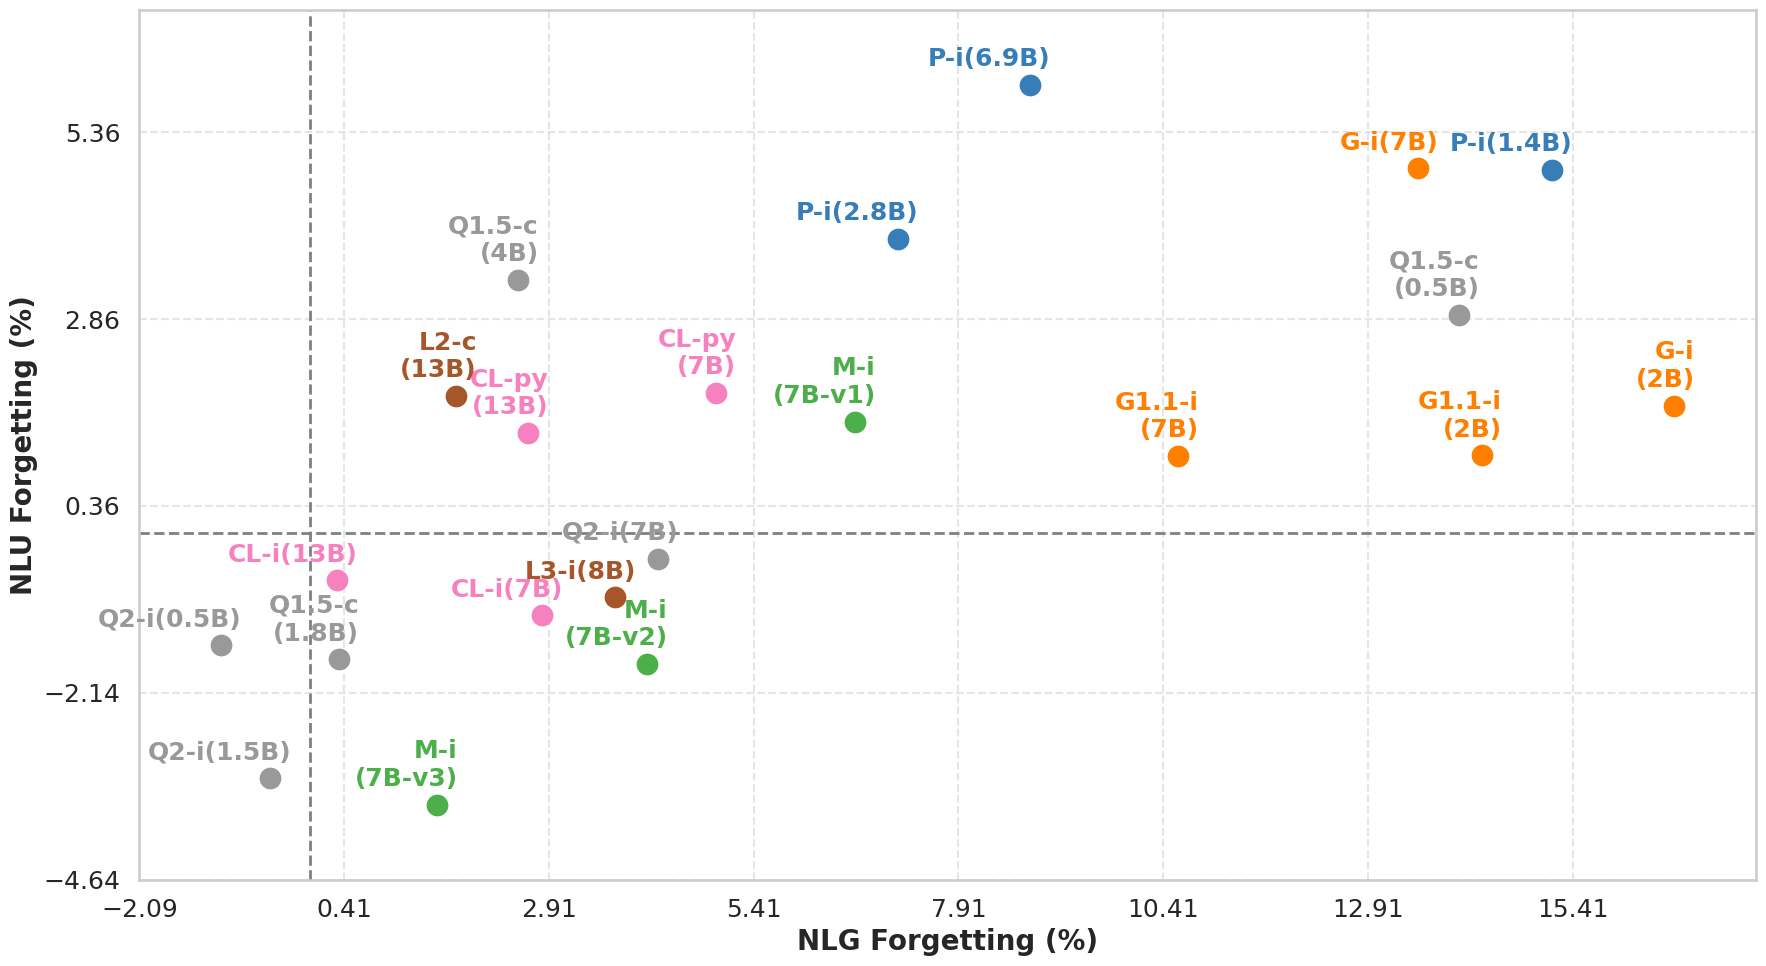

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import hmean

CB = ['#377eb8', '#ff7f00', '#4daf4a',
      '#f781bf', '#a65628', '#984ea3',
      '#999999', '#e41a1c', '#dede00']

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': [10, 6],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

plt.rcParams["figure.autolayout"] = True

# Load the JSON data from the file
with open('results_nlp.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Dictionary mapping instruct models to their corresponding base models
instruct_to_base_mapping = {
    "pythia-2.8b-deduped-synthetic-instruct": "pythia-2.8b-deduped",
    "pythia-1.4b-deduped-synthetic-instruct": "pythia-1.4b-deduped",
    "pythia-6.9b-deduped-synthetic-instruct": "pythia-6.9b-deduped",
    "gemma-2b-it": "gemma-2b",
    "gemma-1.1-2b-it": "gemma-2b",
    "gemma-7b-it": "gemma-7b",
    "gemma-1.1-7b-it": "gemma-7b",
    "Mistral-7B-Instruct-v0.1": "Mistral-7B-v0.1",
    "Mistral-7B-Instruct-v0.2": "Mistral-7B-v0.1",
    "Mistral-7B-Instruct-v0.3": "Mistral-7B-v0.3",
    "CodeLlama-7b-Python-hf": "CodeLlama-7b-hf",
    "CodeLlama-7b-Instruct-hf": "CodeLlama-7b-hf",
    "CodeLlama-13b-Instruct-hf": "CodeLlama-13b-hf",
    "CodeLlama-13b-Python-hf": "CodeLlama-13b-hf",
    "Llama-2-13b-chat-hf": "Llama-2-13b-hf",
    "CodeLlama-34b-Instruct-hf": "CodeLlama-34b-hf",
    "CodeLlama-34b-Python-hf": "CodeLlama-34b-hf",
    "Meta-Llama-3-8B-Instruct": "Meta-Llama-3-8B",
    "Qwen1.5-0.5B-Chat": "Qwen1.5-0.5B",
    "Qwen1.5-1.8B-Chat": "Qwen1.5-1.8B",
    "Qwen1.5-4B-Chat": "Qwen1.5-4B",
    # "Qwen1.5-7B-Chat": "Qwen1.5-7B",
    "Qwen2-0.5B-Instruct": "Qwen2-0.5B",
    "Qwen2-1.5B-Instruct": "Qwen2-1.5B",
    "Qwen2-7B-Instruct": "Qwen2-7B"
}

# Short labels for each model
short_label_mapping = {
    "pythia-2.8b-deduped-synthetic-instruct": "P-i(2.8B)",
    "pythia-1.4b-deduped-synthetic-instruct": "P-i(1.4B)",
    "pythia-6.9b-deduped-synthetic-instruct": "P-i(6.9B)",
    "gemma-2b-it": "G-i\n(2B)",
    "gemma-2b": "G(2B)",
    "gemma-1.1-2b-it": "G1.1-i\n(2B)",
    "gemma-7b": "G(7B)",
    "gemma-7b-it": "G-i(7B)",
    "gemma-1.1-7b-it": "G1.1-i\n(7B)",
    "Mistral-7B-Instruct-v0.1": "M-i\n(7B-v1)",
    "Mistral-7B-Instruct-v0.2": "M-i\n(7B-v2)",
    "Mistral-7B-Instruct-v0.3": "M-i\n(7B-v3)",
    "CodeLlama-7b-Python-hf": "CL-py\n(7B)",
    "CodeLlama-7b-Instruct-hf": "CL-i(7B)",
    "CodeLlama-13b-Instruct-hf": "CL-i(13B)",
    "CodeLlama-13b-Python-hf": "CL-py\n(13B)",
    "Llama-2-13b-hf": "L2(13B)",
    "Llama-2-13b-chat-hf": "L2-c\n(13B)",
    "CodeLlama-34b-Instruct-hf": "CL-i(34B)",
    "CodeLlama-34b-Python-hf": "CL-py\n(34B)",
    "Meta-Llama-3-8B-Instruct": "L3-i(8B)",
    "Qwen1.5-0.5B-Chat": "Q1.5-c\n(0.5B)",
    "Qwen1.5-1.8B-Chat": "Q1.5-c\n(1.8B)",
    "Qwen1.5-4B-Chat": "Q1.5-c\n(4B)",
    "Qwen1.5-7B-Chat": "Q1.5-c\n(7B)",
    "Qwen2-0.5B-Instruct": "Q2-i(0.5B)",
    "Qwen2-1.5B-Instruct": "Q2-i(1.5B)",
    "Qwen2-7B-Instruct": "Q2-i(7B)"
}

# Assign colors to each family
family_colors = {
    "pythia": CB[0],
    "gemma": CB[1],
    "Mistral": CB[2],
    "CodeLlama": CB[3],
    "Llama": CB[4],
    "Meta": CB[4],
    "Qwen1.5": CB[6],
    "Qwen2": CB[6]
}

# Function to calculate forgetting and performance using harmonic mean
def calculate_forgetting_and_performance(instruct_to_base_mapping, results):
    scores = []
    for instruct_model, base_model in instruct_to_base_mapping.items():
        # base_model_name = base_model.split('/')[-1]
        instruct_model_name = instruct_model
        
        if base_model in results and instruct_model in results:
            base_nlu_scores = [results[base_model].get(dataset, np.nan) * 100 for dataset in nlu_datasets]
            instruct_nlu_scores = [results[instruct_model].get(dataset, np.nan) * 100 for dataset in nlu_datasets]
            base_nlg_scores = [results[base_model].get(dataset, np.nan) * 100 for dataset in nlg_datasets]
            instruct_nlg_scores = [results[instruct_model].get(dataset, np.nan) * 100 for dataset in nlg_datasets]
            
            valid_base_nlu_scores = [score for score in base_nlu_scores if not np.isnan(score)]
            valid_instruct_nlu_scores = [score for score in instruct_nlu_scores if not np.isnan(score)]
            valid_base_nlg_scores = [score for score in base_nlg_scores if not np.isnan(score)]
            valid_instruct_nlg_scores = [score for score in instruct_nlg_scores if not np.isnan(score)]
            
            if valid_base_nlu_scores and valid_instruct_nlu_scores:
                base_hmean_nlu = hmean(valid_base_nlu_scores)
                instruct_hmean_nlu = hmean(valid_instruct_nlu_scores)
                nlu_forgetting = base_hmean_nlu - instruct_hmean_nlu
            else:
                nlu_forgetting = np.nan
            
            if valid_base_nlg_scores and valid_instruct_nlg_scores:
                base_hmean_nlg = hmean(valid_base_nlg_scores)
                instruct_hmean_nlg = hmean(valid_instruct_nlg_scores)
                nlg_forgetting = base_hmean_nlg - instruct_hmean_nlg
            else:
                nlg_forgetting = np.nan
            
            family = instruct_model.split('-')[0]
            scores.append((instruct_model_name, nlu_forgetting, nlg_forgetting, family))
    return scores

# Calculate forgetting and performance for each model type
scores = calculate_forgetting_and_performance(instruct_to_base_mapping, results)

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(18, 10))

m = 20
p = 18

for i, (model_name, nlu_forgetting, nlg_forgetting, family) in enumerate(scores):
    color = family_colors[family]
    short_label = short_label_mapping.get(model_name, model_name)
    ax.scatter(nlg_forgetting, nlu_forgetting, label=f'{short_label}', s=200, color=color)
    ax.text(nlg_forgetting + 0.25, nlu_forgetting + 0.25, f'{short_label}', fontsize=p, ha='right', color=color, fontweight='bold')

ax.set_xlabel('NLG Forgetting (%)', fontsize=m, fontweight='bold')
ax.set_ylabel('NLU Forgetting (%)', fontsize=m, fontweight='bold')

# Set the y-axis limits to start from -1 and depend on the data
y_min = min([score[1] for score in scores]) - 1
y_max = max([score[1] for score in scores]) + 1
ax.set_ylim(y_min, y_max)

# Set the x-axis limits to start from -1 and depend on the data
x_min = min([score[2] for score in scores]) - 1
x_max = max([score[2] for score in scores]) + 1
ax.set_xlim(x_min, x_max)

ax.xaxis.set_ticks(np.arange(x_min, x_max, step=2.5))
ax.yaxis.set_ticks(np.arange(y_min, y_max, step=2.5))

# Add the horizontal legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Add a custom legend for the family name mappings and label meanings
custom_lines = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[0], markersize=10, label='P: Pythia'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[1], markersize=10, label='G: Gemma'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[2], markersize=10, label='M: Mistral'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[3], markersize=10, label='CL: CodeLlama'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[4], markersize=10, label='L2: Llama2'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[5], markersize=10, label='ML3: Meta-Llama'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[6], markersize=10, label='Q1.5: Qwen1.5'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[7], markersize=10, label='Q2: Qwen2'),
    plt.Line2D([0], [0], color='black', label='i: Instruct'),
    plt.Line2D([0], [0], color='black', label='c: Chat'),
    plt.Line2D([0], [0], color='black', label='py: Python')
]

legend1 = ax.legend(handles=custom_lines, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=m-2)
ax.add_artist(legend1)

# # Label the maximum values on the x and y-axis
# max_x_label = f'Max NLG Forgetting: {x_max:.2f}%'
# max_y_label = f'Max NLU Forgetting: {y_max:.2f}%'
# ax.text(x_max, y_min - 1, max_x_label, fontsize=p, ha='right', va='top', color='black', fontweight='bold')
# ax.text(x_min - 1, y_max, max_y_label, fontsize=p, ha='left', va='bottom', color='black', fontweight='bold')

ax.tick_params(axis='both', which='major', width=2, length=10, labelsize=m-2)
ax.tick_params(axis='both', which='minor', width=2, length=10, labelsize=m-2)
#plt.scatter(0.0, 0, color='red', marker='*', s=200, zorder=5)
# Create a line for y-axis and x-axis at 0. Color should be grey, line type should be dashed, and line width should be 1
plt.axhline(0, color='grey', linestyle='--', linewidth=2)
plt.axvline(0, color='grey', linestyle='--', linewidth=2)
plt.tight_layout()
plt.savefig('nlu_nlg_forgetting_scatter.png', dpi=300)
plt.show()


## With Legend

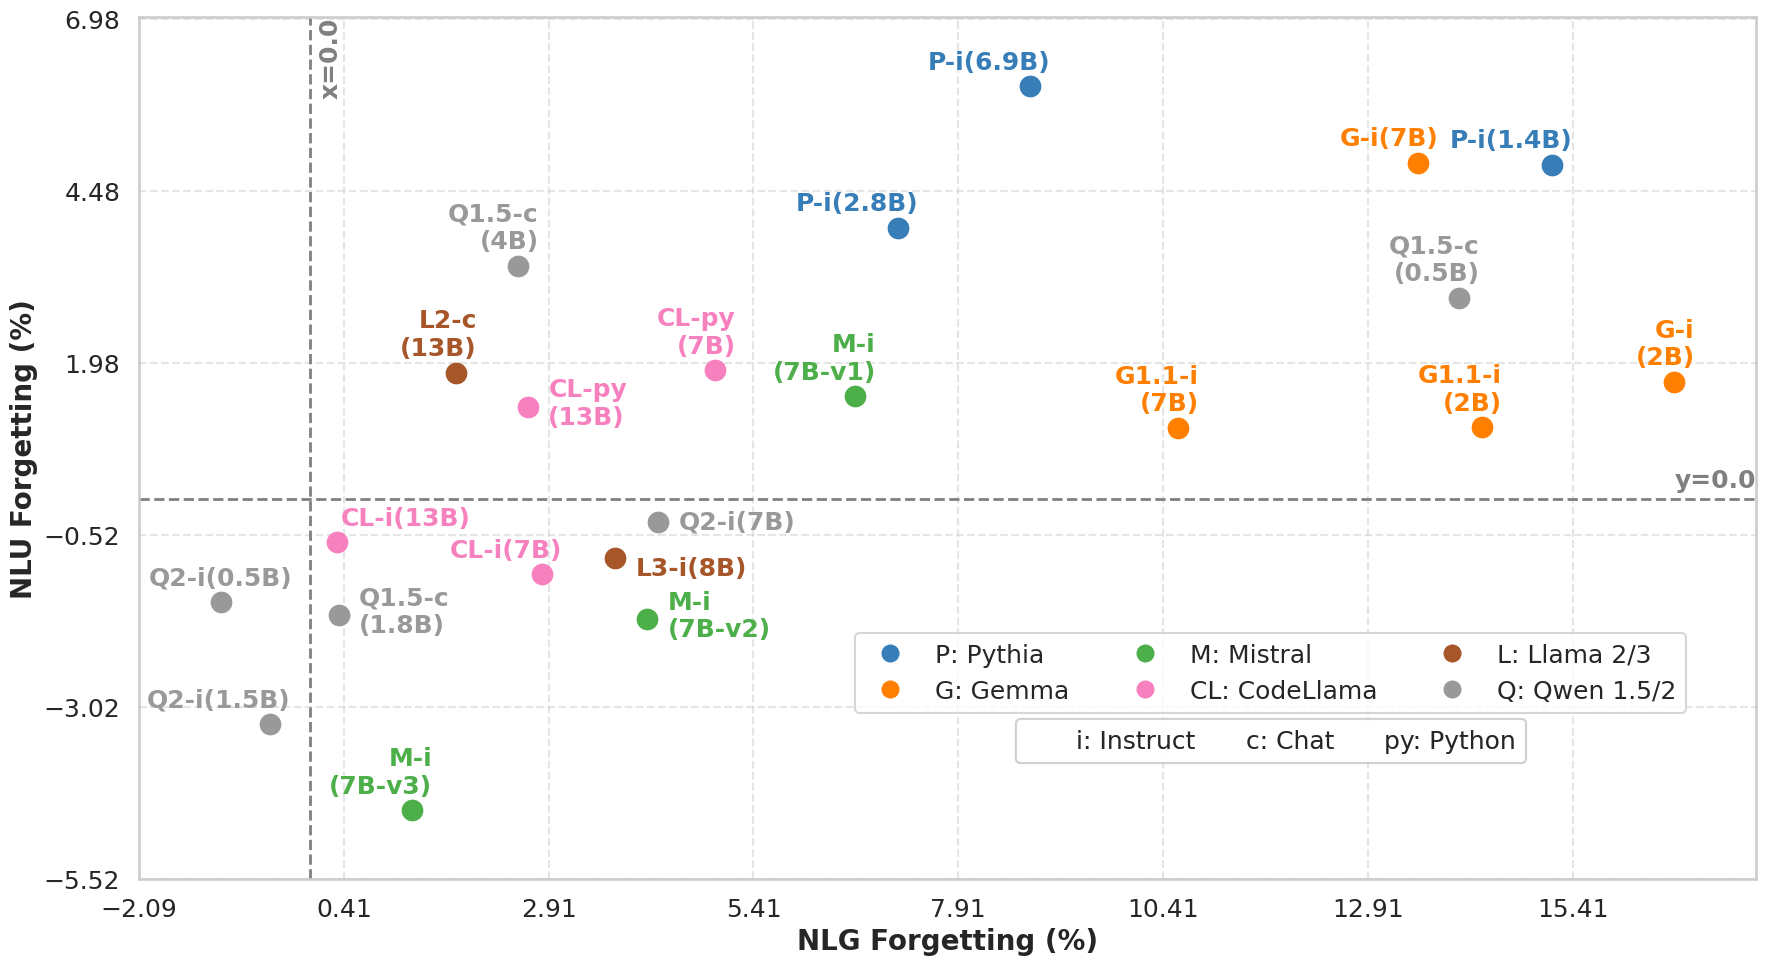

In [50]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import hmean

CB = ['#377eb8', '#ff7f00', '#4daf4a',
      '#f781bf', '#a65628', '#984ea3',
      '#999999', '#e41a1c', '#dede00']

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': [10, 6],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

plt.rcParams["figure.autolayout"] = True

# Load the JSON data from the file
with open('results_nlp.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Dictionary mapping instruct models to their corresponding base models
instruct_to_base_mapping = {
    "pythia-2.8b-deduped-synthetic-instruct": "pythia-2.8b-deduped",
    "pythia-1.4b-deduped-synthetic-instruct": "pythia-1.4b-deduped",
    "pythia-6.9b-deduped-synthetic-instruct": "pythia-6.9b-deduped",
    "gemma-2b-it": "gemma-2b",
    "gemma-1.1-2b-it": "gemma-2b",
    "gemma-7b-it": "gemma-7b",
    "gemma-1.1-7b-it": "gemma-7b",
    "Mistral-7B-Instruct-v0.1": "Mistral-7B-v0.1",
    "Mistral-7B-Instruct-v0.2": "Mistral-7B-v0.1",
    "Mistral-7B-Instruct-v0.3": "Mistral-7B-v0.3",
    "CodeLlama-7b-Python-hf": "CodeLlama-7b-hf",
    "CodeLlama-7b-Instruct-hf": "CodeLlama-7b-hf",
    "CodeLlama-13b-Instruct-hf": "CodeLlama-13b-hf",
    "CodeLlama-13b-Python-hf": "CodeLlama-13b-hf",
    "Llama-2-13b-chat-hf": "Llama-2-13b-hf",
    "CodeLlama-34b-Instruct-hf": "CodeLlama-34b-hf",
    "CodeLlama-34b-Python-hf": "CodeLlama-34b-hf",
    "Meta-Llama-3-8B-Instruct": "Meta-Llama-3-8B",
    "Qwen1.5-0.5B-Chat": "Qwen1.5-0.5B",
    "Qwen1.5-1.8B-Chat": "Qwen1.5-1.8B",
    "Qwen1.5-4B-Chat": "Qwen1.5-4B",
    # "Qwen1.5-7B-Chat": "Qwen1.5-7B",
    "Qwen2-0.5B-Instruct": "Qwen2-0.5B",
    "Qwen2-1.5B-Instruct": "Qwen2-1.5B",
    "Qwen2-7B-Instruct": "Qwen2-7B"
}

# Short labels for each model
short_label_mapping = {
    "pythia-2.8b-deduped-synthetic-instruct": "P-i(2.8B)",
    "pythia-1.4b-deduped-synthetic-instruct": "P-i(1.4B)",
    "pythia-6.9b-deduped-synthetic-instruct": "P-i(6.9B)",
    "gemma-2b-it": "G-i\n(2B)",
    "gemma-2b": "G(2B)",
    "gemma-1.1-2b-it": "G1.1-i\n(2B)",
    "gemma-7b": "G(7B)",
    "gemma-7b-it": "G-i(7B)",
    "gemma-1.1-7b-it": "G1.1-i\n(7B)",
    "Mistral-7B-Instruct-v0.1": "M-i\n(7B-v1)",
    "Mistral-7B-Instruct-v0.2": "M-i\n(7B-v2)",
    "Mistral-7B-Instruct-v0.3": "M-i\n(7B-v3)",
    "CodeLlama-7b-Python-hf": "CL-py\n(7B)",
    "CodeLlama-7b-Instruct-hf": "CL-i(7B)",
    "CodeLlama-13b-Instruct-hf": "CL-i(13B)",
    "CodeLlama-13b-Python-hf": "CL-py\n(13B)",
    "Llama-2-13b-hf": "L2(13B)",
    "Llama-2-13b-chat-hf": "L2-c\n(13B)",
    "CodeLlama-34b-Instruct-hf": "CL-i(34B)",
    "CodeLlama-34b-Python-hf": "CL-py\n(34B)",
    "Meta-Llama-3-8B-Instruct": "L3-i(8B)",
    "Qwen1.5-0.5B-Chat": "Q1.5-c\n(0.5B)",
    "Qwen1.5-1.8B-Chat": "Q1.5-c\n(1.8B)",
    "Qwen1.5-4B-Chat": "Q1.5-c\n(4B)",
    "Qwen1.5-7B-Chat": "Q1.5-c\n(7B)",
    "Qwen2-0.5B-Instruct": "Q2-i(0.5B)",
    "Qwen2-1.5B-Instruct": "Q2-i(1.5B)",
    "Qwen2-7B-Instruct": "Q2-i(7B)"
}

# Assign colors to each family
family_colors = {
    "pythia": CB[0],
    "gemma": CB[1],
    "Mistral": CB[2],
    "CodeLlama": CB[3],
    "Llama": CB[4],
    "Meta": CB[4],
    "Qwen1.5": CB[6],
    "Qwen2": CB[6]
}

# Function to calculate forgetting and performance using harmonic mean
def calculate_forgetting_and_performance(instruct_to_base_mapping, results):
    scores = []
    for instruct_model, base_model in instruct_to_base_mapping.items():
        # base_model_name = base_model.split('/')[-1]
        instruct_model_name = instruct_model
        
        if base_model in results and instruct_model in results:
            base_nlu_scores = [results[base_model].get(dataset, np.nan) * 100 for dataset in nlu_datasets]
            instruct_nlu_scores = [results[instruct_model].get(dataset, np.nan) * 100 for dataset in nlu_datasets]
            base_nlg_scores = [results[base_model].get(dataset, np.nan) * 100 for dataset in nlg_datasets]
            instruct_nlg_scores = [results[instruct_model].get(dataset, np.nan) * 100 for dataset in nlg_datasets]
            
            valid_base_nlu_scores = [score for score in base_nlu_scores if not np.isnan(score)]
            valid_instruct_nlu_scores = [score for score in instruct_nlu_scores if not np.isnan(score)]
            valid_base_nlg_scores = [score for score in base_nlg_scores if not np.isnan(score)]
            valid_instruct_nlg_scores = [score for score in instruct_nlg_scores if not np.isnan(score)]
            
            if valid_base_nlu_scores and valid_instruct_nlu_scores:
                base_hmean_nlu = hmean(valid_base_nlu_scores)
                instruct_hmean_nlu = hmean(valid_instruct_nlu_scores)
                nlu_forgetting = base_hmean_nlu - instruct_hmean_nlu
            else:
                nlu_forgetting = np.nan
            
            if valid_base_nlg_scores and valid_instruct_nlg_scores:
                base_hmean_nlg = hmean(valid_base_nlg_scores)
                instruct_hmean_nlg = hmean(valid_instruct_nlg_scores)
                nlg_forgetting = base_hmean_nlg - instruct_hmean_nlg
            else:
                nlg_forgetting = np.nan
            
            family = instruct_model.split('-')[0]
            scores.append((instruct_model_name, nlu_forgetting, nlg_forgetting, family))
    return scores

# Calculate forgetting and performance for each model type
scores = calculate_forgetting_and_performance(instruct_to_base_mapping, results)

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(18, 10))

m = 20
p = 18

for i, (model_name, nlu_forgetting, nlg_forgetting, family) in enumerate(scores):
    color = family_colors[family]
    short_label = short_label_mapping.get(model_name, model_name)    
    ax.scatter(nlg_forgetting, nlu_forgetting, label=f'{short_label}', s=200, color=color)
    if short_label == 'M-i\n(7B-v2)':
        ax.text(nlg_forgetting + 0.25, nlu_forgetting - 0.25, f'{short_label}', fontsize=p, ha='left', color=color, fontweight='bold')
    elif short_label == 'L3-i(8B)':
        ax.text(nlg_forgetting + 0.25, nlu_forgetting - 0.25, f'{short_label}', fontsize=p, ha='left', color=color, fontweight='bold')
    elif short_label == "Q1.5-c\n(1.8B)":
        ax.text(nlg_forgetting + 0.25, nlu_forgetting - 0.25, f'{short_label}', fontsize=p, ha='left', color=color, fontweight='bold')
    elif short_label == "CL-py\n(13B)":
        ax.text(nlg_forgetting + 0.25, nlu_forgetting - 0.25, f'{short_label}', fontsize=p, ha='left', color=color, fontweight='bold')

    elif short_label == "Q2-i(0.5B)":
        ax.text(nlg_forgetting, nlu_forgetting + 0.25, f'{short_label}', fontsize=p, ha='center', color=color, fontweight='bold')
    elif short_label == "Q2-i(7B)":
        ax.text(nlg_forgetting + 0.25, nlu_forgetting, f'{short_label}', fontsize=p, va='center', color=color, fontweight='bold')
    elif short_label == "CL-i(13B)":
        ax.text(nlg_forgetting + 0.05, nlu_forgetting + 0.25, f'{short_label}', fontsize=p, color=color, fontweight='bold')
    else:
        ax.text(nlg_forgetting + 0.25, nlu_forgetting + 0.25, f'{short_label}', fontsize=p, ha='right', color=color, fontweight='bold')

ax.set_xlabel('NLG Forgetting (%)', fontsize=m, fontweight='bold')
ax.set_ylabel('NLU Forgetting (%)', fontsize=m, fontweight='bold')

# Set the y-axis limits to start from -1 and depend on the data
y_min = min([score[1] for score in scores]) - 1
y_max = max([score[1] for score in scores]) + 1
ax.set_ylim(y_min, y_max)

# Set the x-axis limits to start from -1 and depend on the data
x_min = min([score[2] for score in scores]) - 1
x_max = max([score[2] for score in scores]) + 1
ax.set_xlim(x_min, x_max)

ax.xaxis.set_ticks(np.arange(x_min, x_max, step=2.5))
ax.yaxis.set_ticks(np.arange(y_min, y_max, step=2.5))

# Add the horizontal legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Add a custom legend for the family name mappings and label meanings
custom_lines = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[0], markersize=14, label='P: Pythia'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[1], markersize=14, label='G: Gemma'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[2], markersize=14, label='M: Mistral'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[3], markersize=14, label='CL: CodeLlama'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[4], markersize=14, label='L: Llama 2/3'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[6], markersize=14, label='Q: Qwen 1.5/2'),
]

# Create a separate legend for family names
legend1 = ax.legend(handles=custom_lines, loc='upper center', bbox_to_anchor=(0.7, 0.3), ncol=3, fontsize=m-2, frameon=True)

instruct_chat_python_labels = [
    plt.Line2D([0], [0], color='white', markerfacecolor='white', label='i: Instruct', markersize=0, linewidth=0),
    plt.Line2D([0], [0], color='white', markerfacecolor='white', label='c: Chat', markersize=0, linewidth=0),
    plt.Line2D([0], [0], color='white', markerfacecolor='white', label='py: Python', markersize=0, linewidth=0)
]

legend2 = ax.legend(
    handles=instruct_chat_python_labels, 
    loc='upper center', 
    bbox_to_anchor=(0.7, 0.2), 
    ncol=3, 
    fontsize=m-2, 
    frameon=True, 
    handletextpad=0.0,  # Reduce padding between handle and text
    columnspacing=0.0   # Reduce spacing between columns
)

ax.add_artist(legend1)
ax.add_artist(legend2)

# # Label the maximum values on the x and y-axis
# max_x_label = f'Max NLG Forgetting: {x_max:.2f}%'
# max_y_label = f'Max NLU Forgetting: {y_max:.2f}%'
# ax.text(x_max, y_min - 1, max_x_label, fontsize=p, ha='right', va='top', color='black', fontweight='bold')
# ax.text(x_min - 1, y_max, max_y_label, fontsize=p, ha='left', va='bottom', color='black', fontweight='bold')

ax.tick_params(axis='both', which='major', width=2, length=10, labelsize=m-2)
ax.tick_params(axis='both', which='minor', width=2, length=10, labelsize=m-2)

# Create a line for y-axis and x-axis at 0. Color should be grey, line type should be dashed, and line width should be 1
plt.axhline(0, color='grey', linestyle='--', linewidth=2)
plt.axvline(0, color='grey', linestyle='--', linewidth=2)
# Add labels to the axes at (0, 0)
ax.text(x_max, 0.1, 'y=0.0', fontsize=m-2, ha='right', va='bottom', color='grey', fontweight='bold')
ax.text(0.1, y_max, 'x=0.0', fontsize=m-2, ha='left', va='top', color='grey', fontweight='bold', rotation=90)


plt.tight_layout()
plt.savefig('nlu_nlg_forgetting_scatter.png', dpi=300)
plt.show()

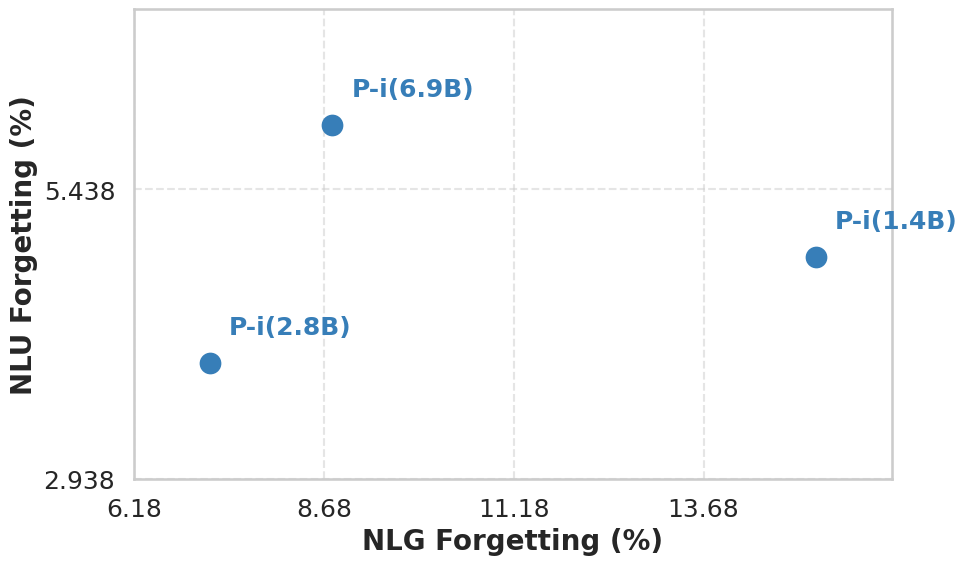

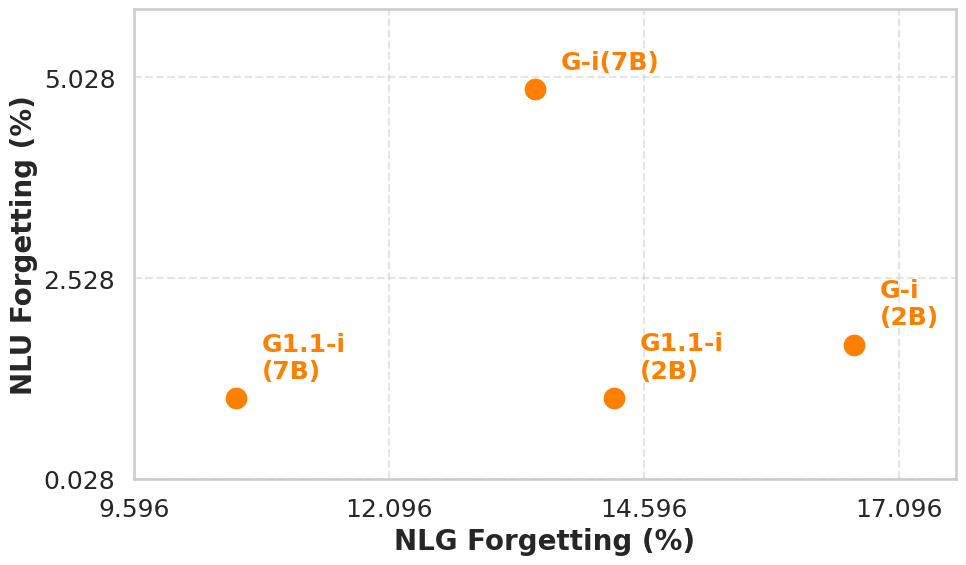

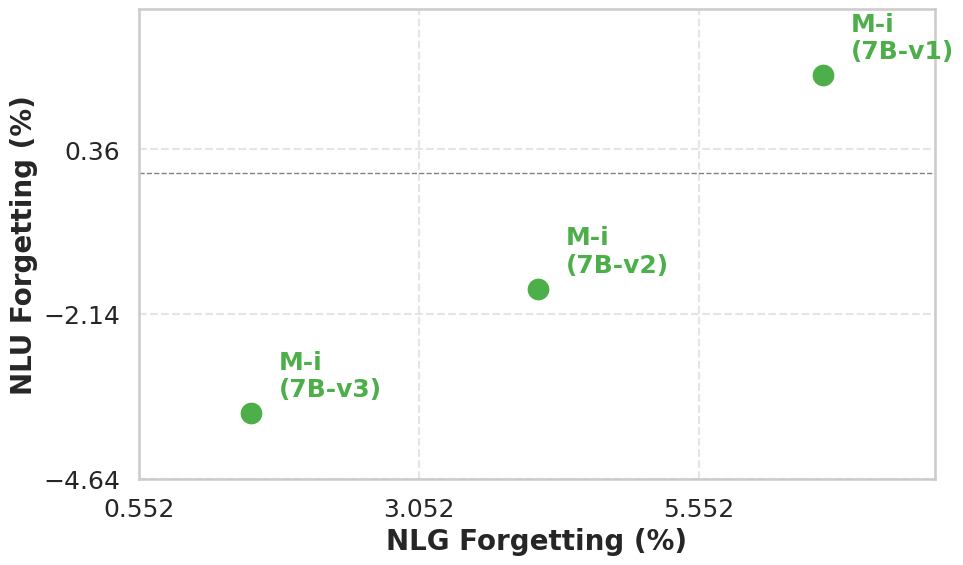

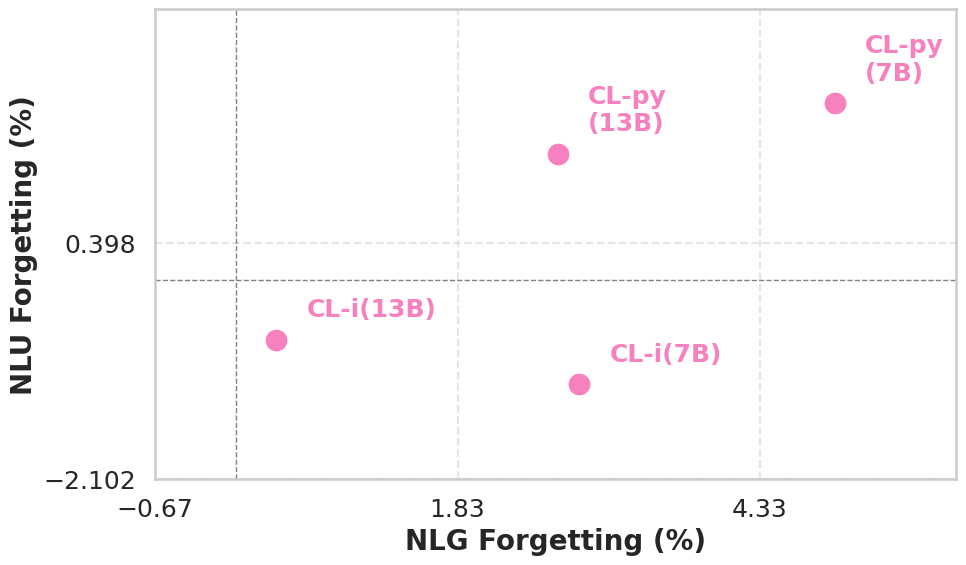

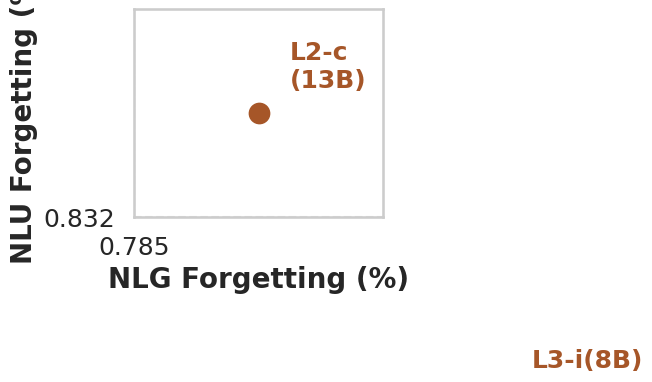

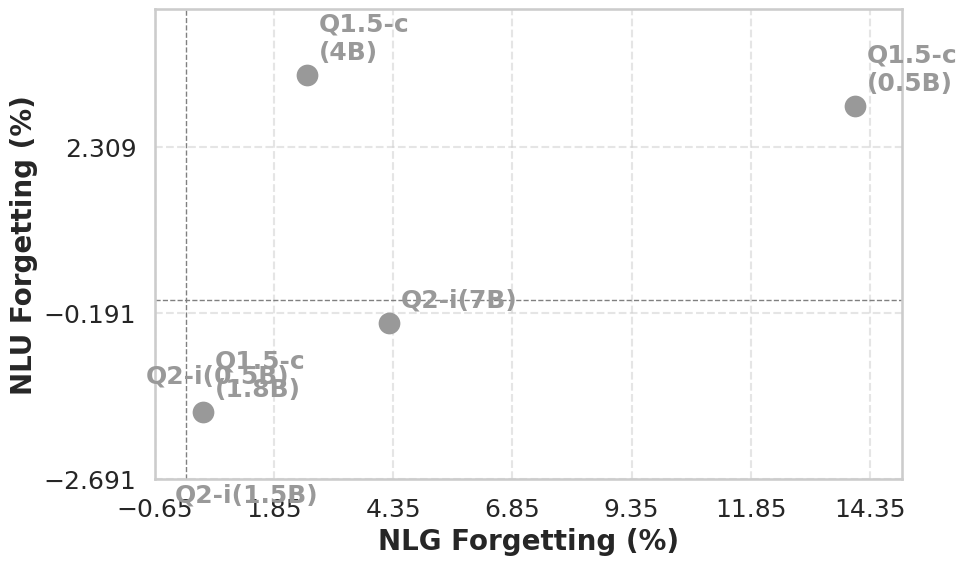

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import hmean

CB = ['#377eb8', '#ff7f00', '#4daf4a',
      '#f781bf', '#a65628', '#984ea3',
      '#999999', '#e41a1c', '#dede00']

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': [10, 6],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

plt.rcParams["figure.autolayout"] = True

# Load the JSON data from the file
with open('results_nlp.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

family_to_instruct_models = {
    "pythia": [
        "pythia-2.8b-deduped-synthetic-instruct",
        "pythia-1.4b-deduped-synthetic-instruct",
        "pythia-6.9b-deduped-synthetic-instruct"
    ],
    "gemma": [
        "gemma-2b-it",
        "gemma-2b",
        "gemma-1.1-2b-it",
        "gemma-7b",
        "gemma-7b-it",
        "gemma-1.1-7b-it"
    ],
    "Mistral": [
        "Mistral-7B-Instruct-v0.1",
        "Mistral-7B-Instruct-v0.2",
        "Mistral-7B-Instruct-v0.3"
    ],
    "CodeLlama": [
        "CodeLlama-7b-Python-hf",
        "CodeLlama-7b-Instruct-hf",
        "CodeLlama-13b-Instruct-hf",
        "CodeLlama-13b-Python-hf",
        "CodeLlama-34b-Instruct-hf",
        "CodeLlama-34b-Python-hf"
    ],
    "Llama": [
        "Llama-2-13b-hf",
        "Llama-2-13b-chat-hf",
        "Meta-Llama-3-8B-Instruct"
    ],
    "Qwen1.5": [
        "Qwen1.5-0.5B-Chat",
        "Qwen1.5-1.8B-Chat",
        "Qwen1.5-4B-Chat",
        "Qwen1.5-7B-Chat",
        "Qwen2-0.5B-Instruct",
        "Qwen2-1.5B-Instruct",
        "Qwen2-7B-Instruct"
    ],
}


# Dictionary mapping instruct models to their corresponding base models
instruct_to_base_mapping = {
    "pythia-2.8b-deduped-synthetic-instruct": "pythia-2.8b-deduped",
    "pythia-1.4b-deduped-synthetic-instruct": "pythia-1.4b-deduped",
    "pythia-6.9b-deduped-synthetic-instruct": "pythia-6.9b-deduped",
    "gemma-2b-it": "gemma-2b",
    "gemma-1.1-2b-it": "gemma-2b",
    "gemma-7b-it": "gemma-7b",
    "gemma-1.1-7b-it": "gemma-7b",
    "Mistral-7B-Instruct-v0.1": "Mistral-7B-v0.1",
    "Mistral-7B-Instruct-v0.2": "Mistral-7B-v0.1",
    "Mistral-7B-Instruct-v0.3": "Mistral-7B-v0.1",
    "CodeLlama-7b-Python-hf": "CodeLlama-7b-hf",
    "CodeLlama-7b-Instruct-hf": "CodeLlama-7b-hf",
    "CodeLlama-13b-Instruct-hf": "CodeLlama-13b-hf",
    "CodeLlama-13b-Python-hf": "CodeLlama-13b-hf",
    "Llama-2-13b-chat-hf": "Llama-2-13b-hf",
    "CodeLlama-34b-Instruct-hf": "CodeLlama-34b-hf",
    "CodeLlama-34b-Python-hf": "CodeLlama-34b-hf",
    "Meta-Llama-3-8B-Instruct": "Meta-Llama-3-8B",
    "Qwen1.5-0.5B-Chat": "Qwen1.5-0.5B",
    "Qwen1.5-1.8B-Chat": "Qwen1.5-1.8B",
    "Qwen1.5-4B-Chat": "Qwen1.5-4B",
    # "Qwen1.5-7B-Chat": "Qwen1.5-7B",
    "Qwen2-0.5B-Instruct": "Qwen2-0.5B",
    "Qwen2-1.5B-Instruct": "Qwen2-1.5B",
    "Qwen2-7B-Instruct": "Qwen2-7B"
}

# Short labels for each model
short_label_mapping = {
    "pythia-2.8b-deduped-synthetic-instruct": "P-i(2.8B)",
    "pythia-1.4b-deduped-synthetic-instruct": "P-i(1.4B)",
    "pythia-6.9b-deduped-synthetic-instruct": "P-i(6.9B)",
    "gemma-2b-it": "G-i\n(2B)",
    "gemma-2b": "G(2B)",
    "gemma-1.1-2b-it": "G1.1-i\n(2B)",
    "gemma-7b": "G(7B)",
    "gemma-7b-it": "G-i(7B)",
    "gemma-1.1-7b-it": "G1.1-i\n(7B)",
    "Mistral-7B-Instruct-v0.1": "M-i\n(7B-v1)",
    "Mistral-7B-Instruct-v0.2": "M-i\n(7B-v2)",
    "Mistral-7B-Instruct-v0.3": "M-i\n(7B-v3)",
    "CodeLlama-7b-Python-hf": "CL-py\n(7B)",
    "CodeLlama-7b-Instruct-hf": "CL-i(7B)",
    "CodeLlama-13b-Instruct-hf": "CL-i(13B)",
    "CodeLlama-13b-Python-hf": "CL-py\n(13B)",
    "Llama-2-13b-hf": "L2(13B)",
    "Llama-2-13b-chat-hf": "L2-c\n(13B)",
    "CodeLlama-34b-Instruct-hf": "CL-i(34B)",
    "CodeLlama-34b-Python-hf": "CL-py\n(34B)",
    "Meta-Llama-3-8B-Instruct": "L3-i(8B)",
    "Qwen1.5-0.5B-Chat": "Q1.5-c\n(0.5B)",
    "Qwen1.5-1.8B-Chat": "Q1.5-c\n(1.8B)",
    "Qwen1.5-4B-Chat": "Q1.5-c\n(4B)",
    "Qwen1.5-7B-Chat": "Q1.5-c\n(7B)",
    "Qwen2-0.5B-Instruct": "Q2-i(0.5B)",
    "Qwen2-1.5B-Instruct": "Q2-i(1.5B)",
    "Qwen2-7B-Instruct": "Q2-i(7B)"
}

# Assign colors to each family
family_colors = {
    "pythia": CB[0],
    "gemma": CB[1],
    "Mistral": CB[2],
    "CodeLlama": CB[3],
    "Llama": CB[4],
    "Meta": CB[5],
    "Qwen1.5": CB[6],
    "Qwen2": CB[7]
}

# Function to calculate forgetting and performance using harmonic mean
def calculate_forgetting_and_performance(instruct_to_base_mapping, results):
    scores = []
    for instruct_model, base_model in instruct_to_base_mapping.items():
        # base_model_name = base_model.split('/')[-1]
        instruct_model_name = instruct_model
        
        if base_model in results and instruct_model in results:
            base_nlu_scores = [results[base_model].get(dataset, np.nan) * 100 for dataset in nlu_datasets]
            instruct_nlu_scores = [results[instruct_model].get(dataset, np.nan) * 100 for dataset in nlu_datasets]
            base_nlg_scores = [results[base_model].get(dataset, np.nan) * 100 for dataset in nlg_datasets]
            instruct_nlg_scores = [results[instruct_model].get(dataset, np.nan) * 100 for dataset in nlg_datasets]
            
            valid_base_nlu_scores = [score for score in base_nlu_scores if not np.isnan(score)]
            valid_instruct_nlu_scores = [score for score in instruct_nlu_scores if not np.isnan(score)]
            valid_base_nlg_scores = [score for score in base_nlg_scores if not np.isnan(score)]
            valid_instruct_nlg_scores = [score for score in instruct_nlg_scores if not np.isnan(score)]
            
            if valid_base_nlu_scores and valid_instruct_nlu_scores:
                base_hmean_nlu = hmean(valid_base_nlu_scores)
                instruct_hmean_nlu = hmean(valid_instruct_nlu_scores)
                nlu_forgetting = base_hmean_nlu - instruct_hmean_nlu
            else:
                nlu_forgetting = np.nan
            
            if valid_base_nlg_scores and valid_instruct_nlg_scores:
                base_hmean_nlg = hmean(valid_base_nlg_scores)
                instruct_hmean_nlg = hmean(valid_instruct_nlg_scores)
                nlg_forgetting = base_hmean_nlg - instruct_hmean_nlg
            else:
                nlg_forgetting = np.nan
            
            family = instruct_model.split('-')[0]
            scores.append((instruct_model_name, nlu_forgetting, nlg_forgetting, family))
    return scores

# Calculate forgetting and performance for each model type
scores = calculate_forgetting_and_performance(instruct_to_base_mapping, results)

# Create separate plots for each model family
for family, models in family_to_instruct_models.items():
    fig, ax = plt.subplots(figsize=(10, 6))
    m = 20
    p = 18
    
    for model_name in models:
        for score in scores:
            if score[0] == model_name:
                _, nlu_forgetting, nlg_forgetting, _ = score
                color = family_colors[family]
                short_label = short_label_mapping.get(model_name, model_name)
                ax.scatter(nlg_forgetting, nlu_forgetting, label=f'{short_label}', s=200, color=color)
                ax.text(nlg_forgetting + 0.25, nlu_forgetting + 0.25, f'{short_label}', fontsize=p, ha='left', color=color, fontweight='bold')
    
    ax.set_xlabel('NLG Forgetting (%)', fontsize=m, fontweight='bold')
    ax.set_ylabel('NLU Forgetting (%)', fontsize=m, fontweight='bold')
    
    # Set the y-axis limits to start from -1 and depend on the data
    y_min = min([score[1] for score in scores if score[3] == family]) - 1
    y_max = max([score[1] for score in scores if score[3] == family]) + 1
    ax.set_ylim(y_min, y_max)
    
    # Set the x-axis limits to start from -1 and depend on the data
    x_min = min([score[2] for score in scores if score[3] == family]) - 1
    x_max = max([score[2] for score in scores if score[3] == family]) + 1
    ax.set_xlim(x_min, x_max)
    
    ax.xaxis.set_ticks(np.arange(x_min, x_max, step=2.5))
    ax.yaxis.set_ticks(np.arange(y_min, y_max, step=2.5))
    
    # Add a custom legend for the family name mappings and label meanings
    custom_lines = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[0], markersize=10, label='P: Pythia'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[1], markersize=10, label='G: Gemma'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[2], markersize=10, label='M: Mistral'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[3], markersize=10, label='CL: CodeLlama'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[4], markersize=10, label='L2: Llama2'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[5], markersize=10, label='ML3: Meta-Llama'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[6], markersize=10, label='Q1.5: Qwen1.5'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=CB[7], markersize=10, label='Q2: Qwen2'),
        plt.Line2D([0], [0], color='black', label='i: Instruct'),
        plt.Line2D([0], [0], color='black', label='c: Chat'),
        plt.Line2D([0], [0], color='black', label='py: Python')
    ]
    
    #legend1 = ax.legend(handles=custom_lines, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=m-2)
    #ax.add_artist(legend1)
    
    ax.tick_params(axis='both', which='major', width=2, length=10, labelsize=m-2)
    ax.tick_params(axis='both', which='minor', width=2, length=10, labelsize=m-2)
    plt.axhline(0, color='grey', linestyle='--', linewidth=1)
    plt.axvline(0, color='grey', linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.savefig(f'nlu_nlg_forgetting_scatter_{family}.png', dpi=300)
    plt.show()
